In [7]:
import pandas as pd
from matplotlib import pyplot as plt

In [77]:
import re

def atoi(text: str):
    return int(text) if text.isdigit() else text

def natural_keys(text: str):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [2]:
df = pd.read_csv("input/data_10hz/pose_preds.csv")

/tmp/ipykernel_7624/564078681.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("input/data_10hz/pose_preds.csv")


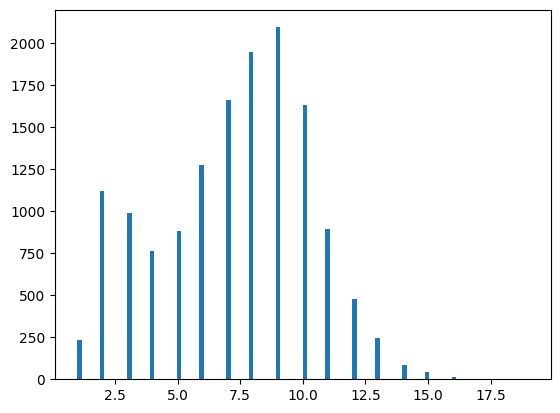

In [13]:
num_instances = df.groupby("frame_filename")["instance_id"].nunique()
plt.hist(num_instances, bins=100)
plt.show()


In [6]:
df["bbox_area"] = (df["bbox_x_2"] - df["bbox_x_1"]) * (df["bbox_y_2"] - df["bbox_y_1"])
df["area"] = df["height"] * df["width"]
df["bbox_area_ratio"] = df["bbox_area"] / df["area"]

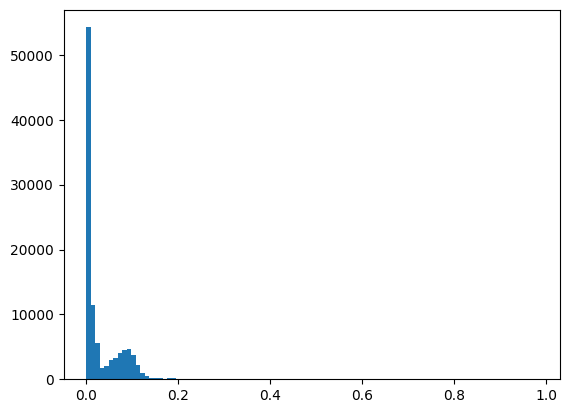

In [10]:
plt.hist(df["bbox_area_ratio"], bins=100)
plt.show()

In [37]:
df.columns

Index(['frame_filename', 'frame_idx', 'action', 'instance_id', 'keypoint_0_x',
       'keypoint_1_x', 'keypoint_2_x', 'keypoint_3_x', 'keypoint_4_x',
       'keypoint_5_x', 'keypoint_6_x', 'keypoint_7_x', 'keypoint_8_x',
       'keypoint_9_x', 'keypoint_10_x', 'keypoint_11_x', 'keypoint_12_x',
       'keypoint_13_x', 'keypoint_14_x', 'keypoint_15_x', 'keypoint_16_x',
       'keypoint_0_y', 'keypoint_1_y', 'keypoint_2_y', 'keypoint_3_y',
       'keypoint_4_y', 'keypoint_5_y', 'keypoint_6_y', 'keypoint_7_y',
       'keypoint_8_y', 'keypoint_9_y', 'keypoint_10_y', 'keypoint_11_y',
       'keypoint_12_y', 'keypoint_13_y', 'keypoint_14_y', 'keypoint_15_y',
       'keypoint_16_y', 'keypoint_score_0', 'keypoint_score_1',
       'keypoint_score_2', 'keypoint_score_3', 'keypoint_score_4',
       'keypoint_score_5', 'keypoint_score_6', 'keypoint_score_7',
       'keypoint_score_8', 'keypoint_score_9', 'keypoint_score_10',
       'keypoint_score_11', 'keypoint_score_12', 'keypoint_score_13',
    

In [87]:
keypoint_score_cols = [col for col in df.columns if col.startswith("keypoint_score_")]
all_keypoint_exits = df[keypoint_score_cols].min(axis=1) > 0.2
is_in = (df["bbox_x_1"] > 0) & (df["bbox_x_2"] < df["width"]) & (df["bbox_y_1"] > 0) & (df["bbox_y_2"] < df["height"])
df_filtered = df[(df["bbox_area_ratio"] > 0.05) & (df["bbox_area_ratio"] < 0.4) & all_keypoint_exits & is_in]

9518


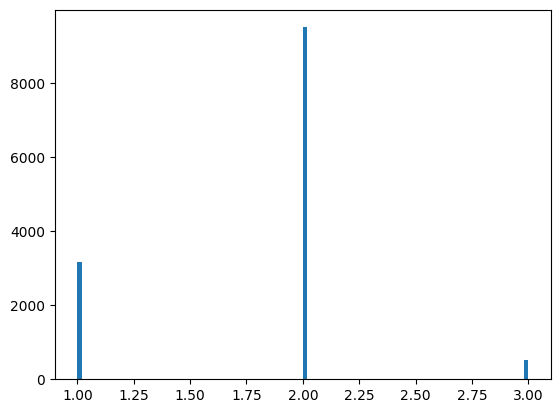

In [88]:
num_instances_filtered = df_filtered.groupby("frame_filename")["instance_id"].nunique()
print((num_instances_filtered==2).sum())
plt.hist(num_instances_filtered, bins=100)
plt.show()

In [89]:
frame_filenames = num_instances_filtered[num_instances_filtered==1].index.to_list()
df_new = df_filtered[df_filtered["frame_filename"].isin(frame_filenames)]



In [91]:
a = sorted(num_instances_filtered[num_instances_filtered==2].index.to_list(), key=natural_keys)

In [95]:
from pprint import pprint
pprint(a)

['2024-11-10-18-25-41_0.jpg',
 '2024-11-10-18-25-41_1.jpg',
 '2024-11-10-18-25-41_2.jpg',
 '2024-11-10-18-25-41_40.jpg',
 '2024-11-10-18-25-41_41.jpg',
 '2024-11-10-18-25-41_42.jpg',
 '2024-11-10-18-25-41_43.jpg',
 '2024-11-10-18-25-41_44.jpg',
 '2024-11-10-18-25-41_45.jpg',
 '2024-11-10-18-25-41_46.jpg',
 '2024-11-10-18-25-41_47.jpg',
 '2024-11-10-18-25-41_48.jpg',
 '2024-11-10-18-25-41_49.jpg',
 '2024-11-10-18-25-41_50.jpg',
 '2024-11-10-18-25-41_51.jpg',
 '2024-11-10-18-25-41_52.jpg',
 '2024-11-10-18-25-41_53.jpg',
 '2024-11-10-18-25-41_54.jpg',
 '2024-11-10-18-25-41_55.jpg',
 '2024-11-10-18-25-41_56.jpg',
 '2024-11-10-18-25-41_57.jpg',
 '2024-11-10-18-25-41_58.jpg',
 '2024-11-10-18-25-41_59.jpg',
 '2024-11-10-18-25-41_60.jpg',
 '2024-11-10-18-25-41_61.jpg',
 '2024-11-10-18-25-41_62.jpg',
 '2024-11-10-18-25-41_63.jpg',
 '2024-11-10-18-25-41_64.jpg',
 '2024-11-10-18-25-41_65.jpg',
 '2024-11-10-18-25-41_66.jpg',
 '2024-11-10-18-25-41_67.jpg',
 '2024-11-10-18-25-41_68.jpg',
 '2024-11-1